# Decision Tree Exercise with Mushrooms Dataset

In [12]:
from pandas import read_csv, DataFrame
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from IPython.display import Image  
from sklearn.tree import export_graphviz
from subprocess import call
import pydotplus
from sklearn.preprocessing import LabelEncoder

## Step 1 - Load data

In [2]:
raw_data = read_csv('mushrooms.csv')
raw_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
class_labels = raw_data['class'].unique()
class_labels

array(['p', 'e'], dtype=object)

In [4]:
feature_columns = raw_data.drop('class', axis=1).columns
label_columns = ['class']
print('feature columns:' + str(feature_columns) + '\n')
print(' label columns:' + str(label_columns))

feature columns:Index([u'cap-shape', u'cap-surface', u'cap-color', u'bruises', u'odor',
       u'gill-attachment', u'gill-spacing', u'gill-size', u'gill-color',
       u'stalk-shape', u'stalk-root', u'stalk-surface-above-ring',
       u'stalk-surface-below-ring', u'stalk-color-above-ring',
       u'stalk-color-below-ring', u'veil-type', u'veil-color', u'ring-number',
       u'ring-type', u'spore-print-color', u'population', u'habitat'],
      dtype='object')

 label columns:['class']


## Step 2 - Split data in train and test

In [5]:
x = raw_data.filter(feature_columns).apply(LabelEncoder().fit_transform).as_matrix()
y = raw_data.filter(label_columns).as_matrix()

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.70, random_state = 100)

## Step 3 - Train decision tree

In [6]:
mushroom_decision_tree = DecisionTreeClassifier().fit(x_train, y_train)

## Step 4 - Test decision tree

In [7]:
y_pred = mushroom_decision_tree.predict(x_test)
'Decision tree accuracy is ' + str(accuracy_score(y_test, y_pred))

'Decision tree accuracy is 1.0'

## Step 5 - Plot the decision tree

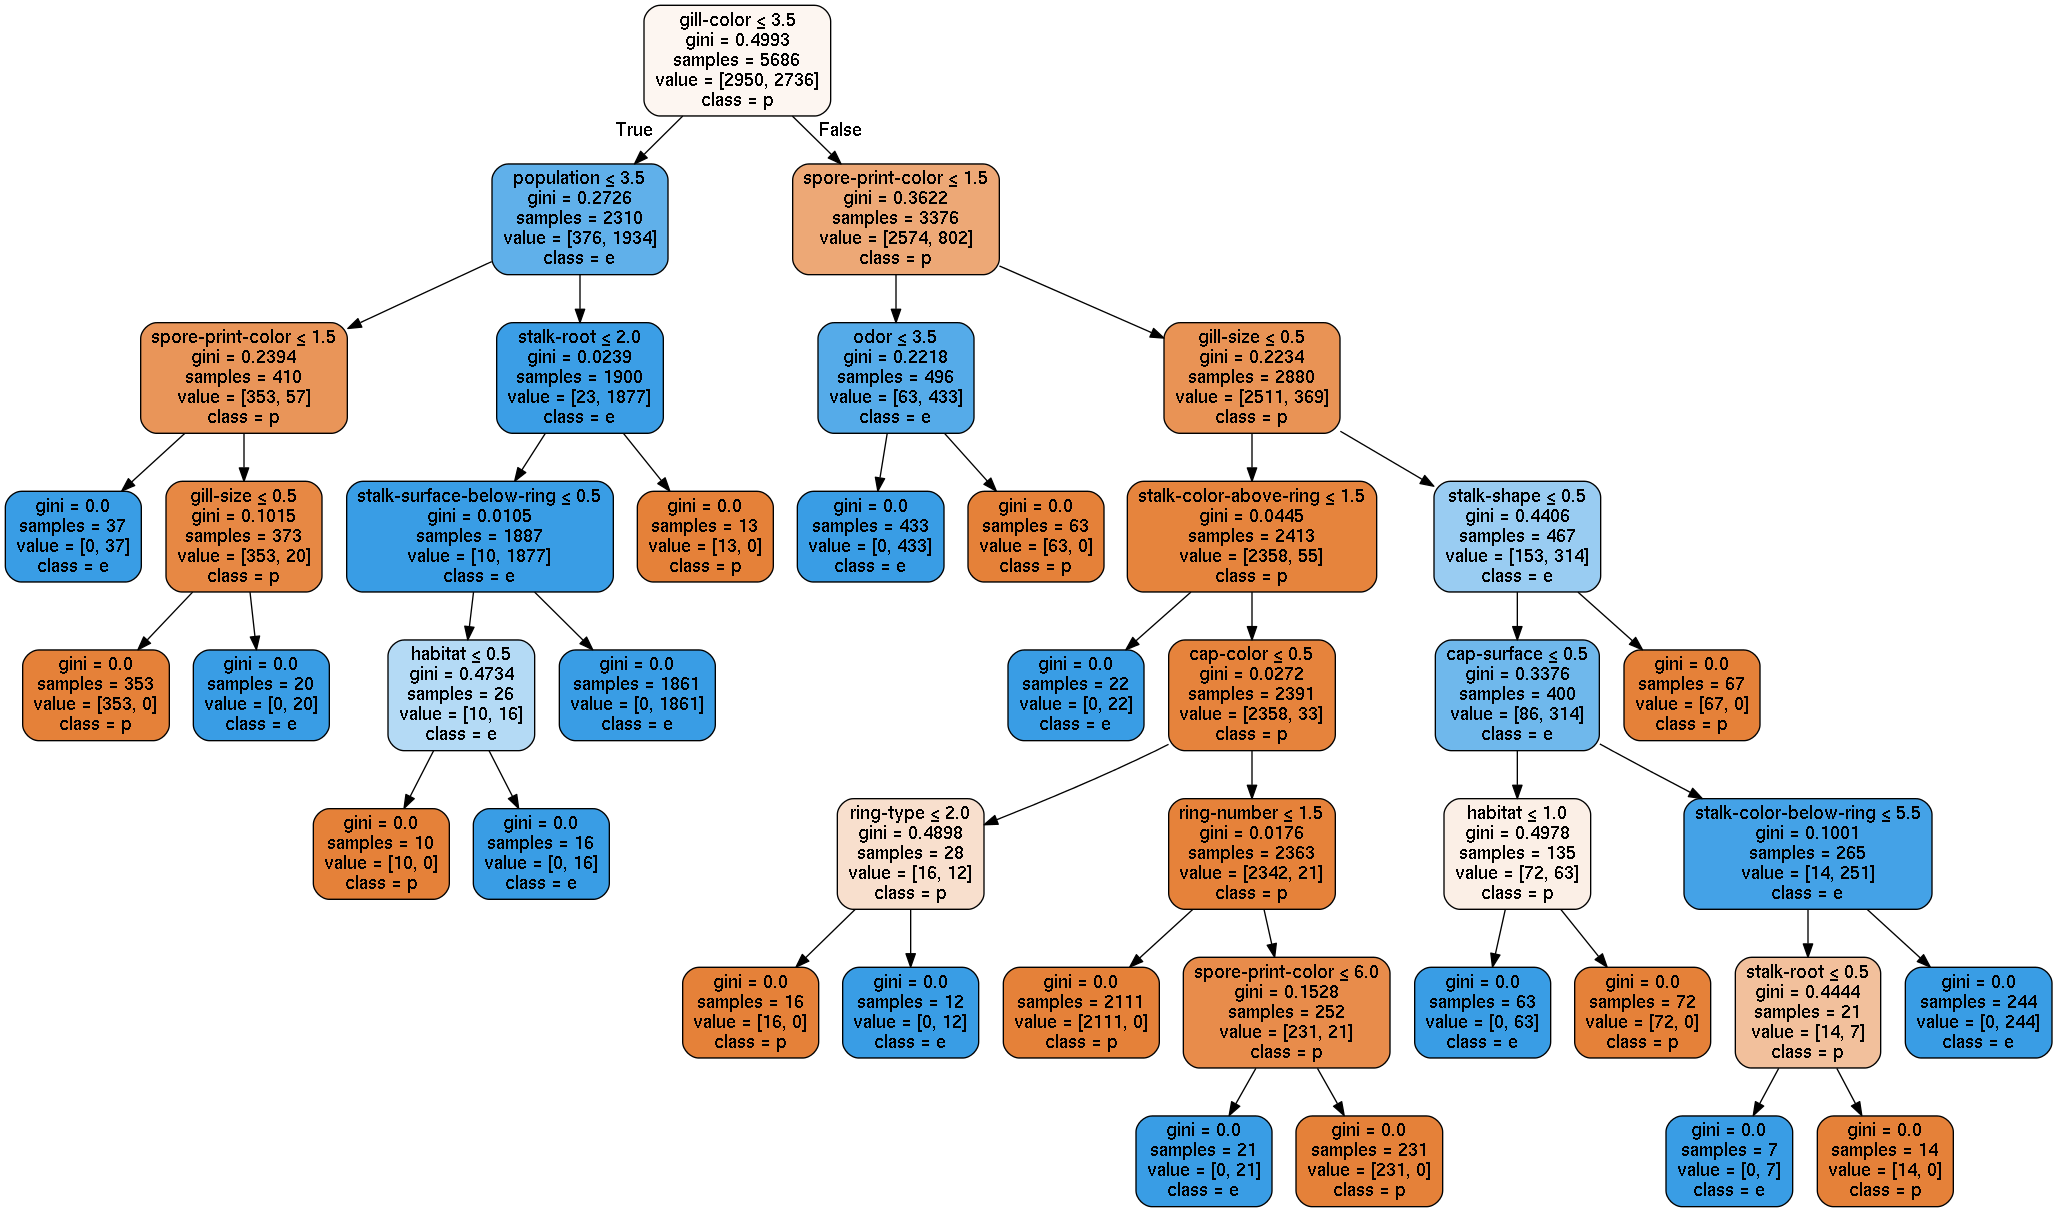

In [8]:
dot_data = export_graphviz(mushroom_decision_tree, out_file=None, 
                    feature_names=feature_columns,
                    class_names=class_labels,  
                    filled=True, 
                    rounded=True,
                    special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

## Attributes importance

In [15]:
attr_importance = DataFrame()
attr_importance['feature']    = feature_columns
attr_importance['importance'] = mushroom_decision_tree.feature_importances_
attr_importance.sort_values('importance', ascending=False)

,feature,importance
8,gill-color,0.347457
19,spore-print-color,0.200182
20,population,0.171189
7,gill-size,0.129645
4,odor,0.038745
21,habitat,0.028006
9,stalk-shape,0.024913
13,stalk-color-above-ring,0.014936
1,cap-surface,0.014547
10,stalk-root,0.012287


## Reduce decision tree complexity

In [20]:
simplified_decision_tree = DecisionTreeClassifier(max_depth=2, min_samples_split=5).fit(x_train, y_train)
y_pred_2 = simplified_decision_tree.predict(x_test)
'Simplified decision tree accuracy is ' + str(accuracy_score(y_test, y_pred_2))

'Simplified decision tree accuracy is 0.913043478261'

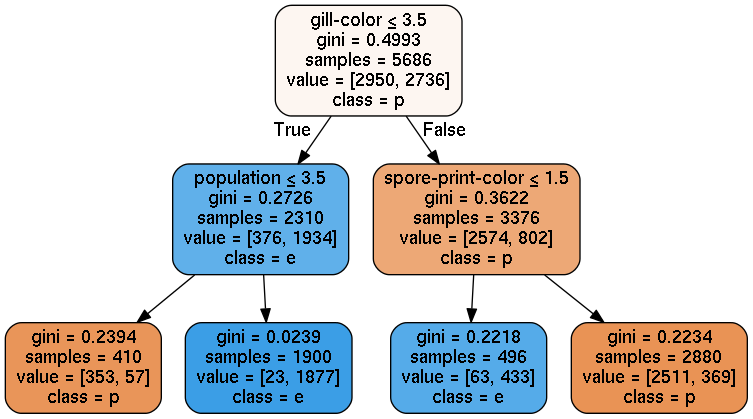

In [21]:
dot_data = export_graphviz(simplified_decision_tree, out_file=None, 
                    feature_names=feature_columns,  
                    class_names=class_labels,  
                    filled=True, rounded=True,  
                    special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())